# Infection on a random network

We simulate infection on a random network with no infection dynamics.

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from geoSIR import geoSIR

## Define the network

In [11]:
num_of_nodes = 300

min_node_pop = 10
max_node_pop = 20000

# Randomly populate the nodes

node_populations_dat = np.array([
    [i, i, int(np.random.random()*(max_node_pop-min_node_pop)+min_node_pop),
     int(np.random.random()*(max_node_pop-min_node_pop)+min_node_pop)/10, 0] for i in range(num_of_nodes)
], dtype=np.double)

# Randomly generate commuter networks

min_num_of_commutes = 1
max_num_of_commutes = 4
min_move_N_ratio = 0.2
max_move_N_ratio = 0.5
max_path_length = 2#num_of_nodes
commuting_time = 0.5

node_pop_tally = np.array( node_populations_dat[:,2] )

commuter_networks_dat = []

def rand_int(low, high):
    if low == high:
        return low
    else:
        return np.random.randint(low, high)

print("Commuter network:\n")    
print('Home:\tFrom:\tTo:\tmove_N:\tt1:\tt2:\tct1:\tct2:')

for i in range(num_of_nodes):
    num_of_commutes = np.random.randint(min_num_of_commutes, max_num_of_commutes+1)
    
    for c in range(num_of_commutes):
        move_N = int(np.floor(node_pop_tally[i]* (np.random.random()*(max_move_N_ratio-min_move_N_ratio) + min_move_N_ratio)))
        node_pop_tally[i] -= move_N
        
        dep_and_arr_times = 24*np.random.random(2)
        dep_time = np.min(dep_and_arr_times)
        arr_time = np.max(dep_and_arr_times)
        
        nodes_excluding_i = list(range(num_of_nodes))
        nodes_excluding_i.remove(i)
        
        path = np.concatenate([
            [i],
            np.random.choice(nodes_excluding_i, rand_int(1, max_path_length), replace=False),
            [i]
        ])
        
        commuting_times = np.random.random(4*len(path))
        commuting_times = np.array([np.sum(commuting_times[:i]) for i in range(len(commuting_times))])
        commuting_times = (arr_time - dep_time)*commuting_times / commuting_times[-1] + dep_time
        
        for j in range(len(path)-1):
            t1, t2, ct1, ct2 = commuting_times[4*j:4*(j+1)]
            commuter_networks_dat.append([
                0, i, path[j % len(path)], path[(j+1) % len(path)], move_N, -1, t1, t2, ct1, ct2, 1, 1, 1
            ])
            
            row_tuple = (i, path[j % len(path)], path[(j+1) % len(path)], move_N, t1, t2, ct1, ct2)
            row_tuple = tuple(map(lambda n: round(n, 1), row_tuple))
            print("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t" % row_tuple)
            
commuter_networks_dat = np.array(commuter_networks_dat)

Commuter network:

Home:	From:	To:	move_N:	t1:	t2:	ct1:	ct2:
0	0	172	4735	1.7	4.0	5.8	6.7	
0	172	0	4735	8.3	10.4	12.3	14.8	
1	1	149	5288	1.0	1.8	2.1	3.4	
1	149	1	5288	4.5	4.5	6.1	7.1	
2	2	174	850	3.4	6.0	7.5	9.9	
2	174	2	850	10.3	10.9	13.5	15.8	
2	2	290	729	15.1	15.2	15.8	15.8	
2	290	2	729	16.7	17.6	18.0	18.9	
2	2	50	333	10.9	12.0	14.0	15.0	
2	50	2	333	15.6	16.7	18.4	19.4	
3	3	221	3344	11.4	11.5	12.5	14.2	
3	221	3	3344	16.6	17.1	17.2	17.3	
3	3	158	1326	4.7	5.5	6.0	6.8	
3	158	3	1326	7.2	8.0	8.8	9.1	
4	4	58	7396	16.2	16.2	16.4	17.4	
4	58	4	7396	17.8	18.8	19.9	20.8	
4	4	286	5532	3.2	3.3	3.5	3.5	
4	286	4	5532	3.7	3.7	3.8	4.0	
5	5	124	4631	19.0	19.1	19.4	20.0	
5	124	5	4631	20.2	20.7	21.0	21.7	
5	5	196	4630	18.6	18.8	19.7	20.4	
5	196	5	4630	21.3	21.4	21.5	21.6	
5	5	55	1569	0.8	2.3	7.1	7.3	
5	55	5	1569	10.1	10.7	14.8	16.4	
6	6	292	3540	2.9	3.0	3.0	3.1	
6	292	6	3540	3.4	3.5	3.9	4.1	
6	6	34	1578	4.7	5.8	9.6	12.1	
6	34	6	1578	12.8	13.9	14.2	14.3	
6	6	159	1914	1.2	1.3	1.8	2.1	
6	159	6	1914	2.2	2.

143	143	39	641	10.6	10.9	11.4	12.1	
143	39	143	641	12.3	12.4	13.3	13.5	
144	144	157	2697	14.3	14.8	15.1	15.1	
144	157	144	2697	15.6	17.1	17.7	19.2	
144	144	44	1959	13.1	13.8	14.9	16.1	
144	44	144	1959	16.8	17.6	18.3	18.7	
144	144	217	1014	7.1	7.4	8.5	10.1	
144	217	144	1014	11.8	11.8	13.3	14.8	
145	145	268	3013	0.8	1.3	1.7	1.9	
145	268	145	3013	2.4	2.8	3.1	3.5	
146	146	281	3886	11.8	13.4	14.8	15.1	
146	281	146	3886	16.0	17.1	18.1	19.5	
147	147	144	7276	3.7	4.1	7.4	10.6	
147	144	147	7276	10.7	13.7	14.9	16.5	
148	148	178	5539	1.2	2.5	4.0	5.0	
148	178	148	5539	6.6	7.9	9.5	11.0	
148	148	175	1209	13.8	14.0	14.0	14.1	
148	175	148	1209	14.4	14.7	14.7	14.9	
148	148	68	1731	0.7	1.9	4.7	5.3	
148	68	148	1731	8.6	9.0	12.2	14.1	
148	148	247	1087	10.9	11.4	12.0	12.2	
148	247	148	1087	12.4	12.8	13.3	13.9	
149	149	290	5110	8.8	9.2	9.8	10.3	
149	290	149	5110	10.4	11.0	11.2	11.3	
149	149	216	5522	15.1	16.2	17.0	18.0	
149	216	149	5522	19.1	20.1	20.6	20.9	
150	150	61	1034	7.7	8.1	8.9	9.5	
150	61	150	1034	9

276	276	74	1643	18.8	19.0	19.1	19.2	
276	74	276	1643	19.3	19.6	19.8	20.0	
277	277	274	2834	3.7	4.7	7.4	9.4	
277	274	277	2834	10.7	11.2	11.9	14.6	
278	278	129	8903	7.1	7.6	7.9	8.7	
278	129	278	8903	8.9	10.5	12.3	13.8	
278	278	208	4672	14.1	14.7	15.1	15.8	
278	208	278	4672	16.5	16.6	17.0	17.2	
279	279	35	6310	0.6	2.3	4.9	6.3	
279	35	279	6310	8.7	11.6	14.3	16.9	
279	279	223	3754	15.9	16.1	16.2	16.4	
279	223	279	3754	16.5	16.6	16.9	17.3	
279	279	176	2513	12.5	12.8	12.9	13.3	
279	176	279	2513	13.6	13.7	14.1	14.2	
280	280	109	2789	13.9	14.3	14.5	14.7	
280	109	280	2789	14.8	15.2	15.6	15.7	
280	280	128	766	0.0	1.6	4.3	6.9	
280	128	280	766	7.1	9.5	10.5	12.5	
281	281	206	3494	12.9	13.5	14.3	14.3	
281	206	281	3494	14.8	15.7	16.1	17.2	
282	282	217	5223	1.0	1.8	2.1	2.8	
282	217	282	5223	3.6	4.2	4.2	4.2	
282	282	243	4609	21.9	22.0	22.0	22.1	
282	243	282	4609	22.2	22.3	22.3	22.4	
282	282	271	2436	14.1	14.6	15.0	15.5	
282	271	282	2436	15.5	16.2	17.0	17.6	
283	283	113	6440	18.3	19.2	19.5	19.7	
283	113	

## Run simulation

Note, the simulation is prone to errors when choosing too large a time-step. If we set `dt=1e-2`, we will sometimes (depending on the random network) observe aperiodicity in SIR curves. This is of course an error, as the commuter-networks are by definition periodic, and they have been randomly constructed to be cyclical.

In [12]:
# Define SIR parameters

beta = cbeta = gamma = cgamma = 0

beta = 0.012
cbeta = 0.012
gamma = 0.003
cgamma = 0.003

contact_mat = np.array([
    [1]
], dtype=np.double)


# Initialize geoSIR

sim = geoSIR()

dt = 1/(60)
sim_days = 100
t_start = 0
t_end = 24*sim_days

X_state = sim.initialize(node_populations_dat, commuter_networks_dat, beta, cbeta, gamma, cgamma, contact_mat)
dX_state = np.zeros( X_state.size )

res = sim.forward_euler(X_state, dX_state, t_start, t_end, dt, save_states=60)

## Plot results

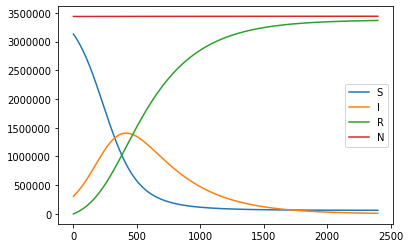

In [13]:
ts, nodeh = sim.get_network_history(res)
S,I,R = nodeh.T

plt.plot(ts, np.sum(S, axis=0), label="S")
plt.plot(ts, np.sum(I, axis=0), label="I")
plt.plot(ts, np.sum(R, axis=0), label="R")
plt.plot(ts, np.sum(S+I+R, axis=0), label="N")

plt.legend()

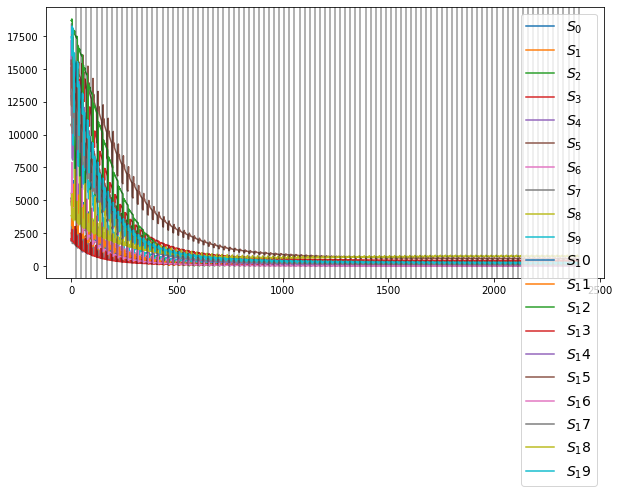

In [5]:
plt.figure(figsize=(10,5))

#ts, nodeh = sim.get_network_history(res)
#S_tot, _, _ = nodeh[:, 0, :].T
#plt.plot(ts, S_tot, label="$N$")

for i in range(num_of_nodes):
    ts, nodeh = sim.get_node_history(i, res)
    S, _, _ = nodeh[:, :].T
    plt.plot(ts, S, label="$S_%s$" % i)
    
for i in range(sim_days):
    plt.axvline( (i+1)*24, color=(0,0,0,0.4) )
    
plt.legend(loc='upper right', fontsize=14)

In [6]:
ts, nodeh = sim.get_cnode_history(0, 0, 0, 6, res)
S001, _, _ = nodeh[:, :].T

plt.figure(figsize=(10,5))
plt.plot(ts, S001, label=r'$S_{0,(0 \to 1)}$')
plt.legend(loc='upper right', fontsize=14)

KeyError: (0, 0, 0, 0, 6)

## Visualise network

For the network visualisations, we must define the position of each node. This does not affect the simulation.

In [ ]:
# node, x, y

node_positions_dat = np.array([
    [0, 0, 0],
    [1, 10, 0]
])

We pass the system parameters and the simulation result `res`, into the visualiser `geoSIRvisualiser`.

In [ ]:
from geoSIRvisualiser import geoSIRvisualiser
from IPython.display import Video
from IPython.display import clear_output

vis = geoSIRvisualiser()
vis.setup(node_positions_dat, node_populations_dat, commuter_networks_dat)
ani = vis.animate(sim, res, interval=100, figsize=(10, 10))

vid_name = 'Movement between two nodes.mp4'
ani.save("./videos/%s" % vid_name)
Video("./videos/%s" % vid_name)